# Rolling window featuers 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_context("talk")

In [2]:
data = pd.read_csv(
    "../Datasets/victoria_electricity_demand.csv",
    usecols=["demand", "temperature", "date_time"],
    index_col=["date_time"],
    parse_dates=["date_time"],
)

# For this demo we will use a subset of the data
data = data.loc["2010":]

data.head()

,demand,temperature
date_time,,
2010-01-01 00:00:00,8314.448682,21.525
2010-01-01 01:00:00,8267.187296,22.400
2010-01-01 02:00:00,7394.528444,22.150
2010-01-01 03:00:00,6952.047520,21.800
2010-01-01 04:00:00,6867.199634,20.250


<Axes: xlabel='date_time'>

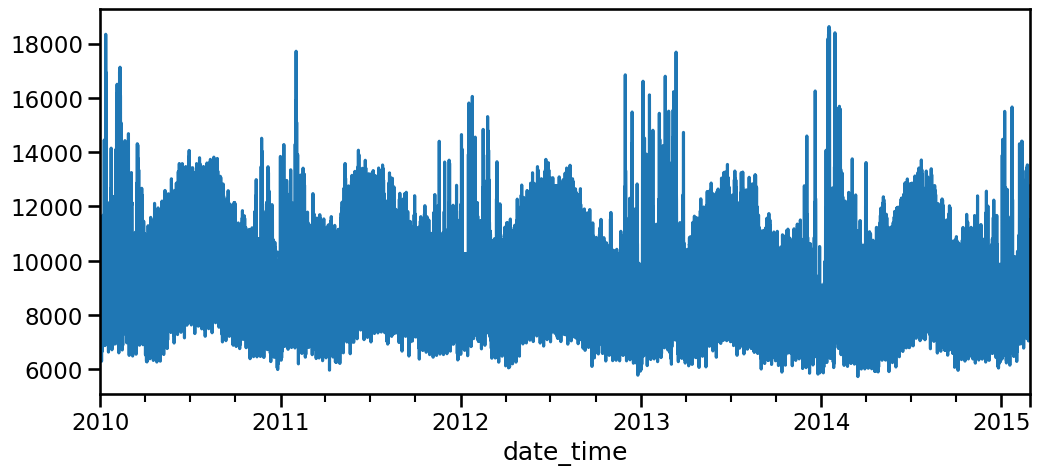

In [3]:
data["demand"].plot(figsize=[12, 5])

<Axes: xlabel='date_time'>

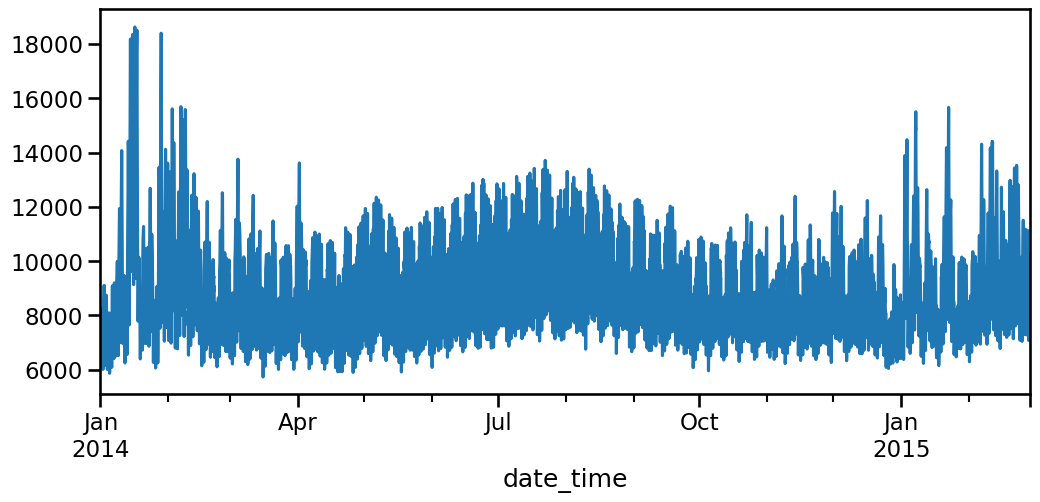

In [4]:
# Plot the data from the year 2014 onwards
data["demand"].loc["2014":].plot(figsize=[12, 5])

<Axes: xlabel='date_time'>

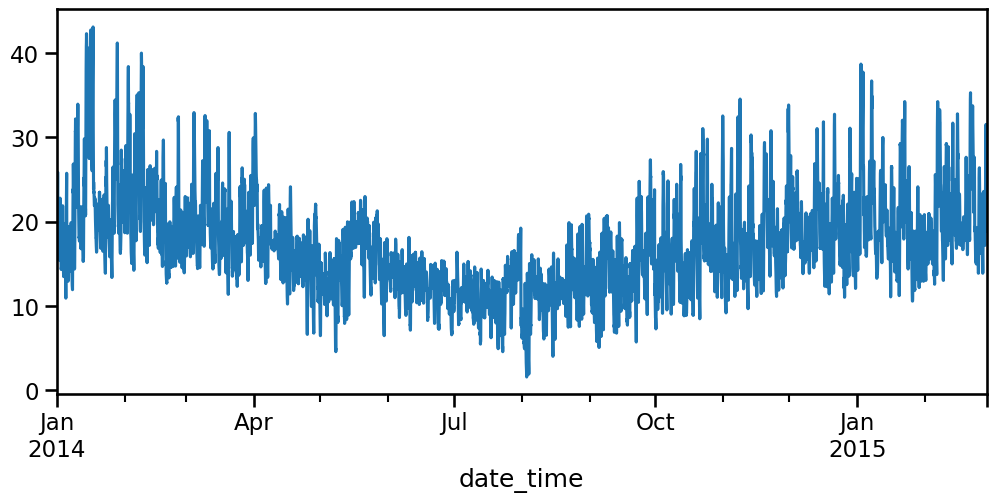

In [5]:
data["temperature"].loc["2014":].plot(figsize=[12, 5])

<Axes: xlabel='date_time'>

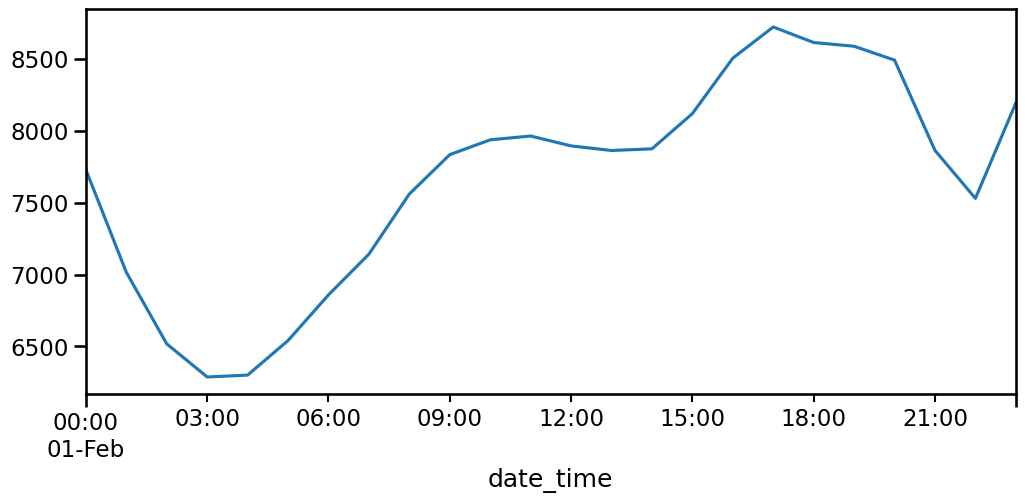

In [6]:
# Demand on a single day
data["demand"].loc["2015-02-01"].plot(figsize=[12, 5])

<Axes: xlabel='date_time'>

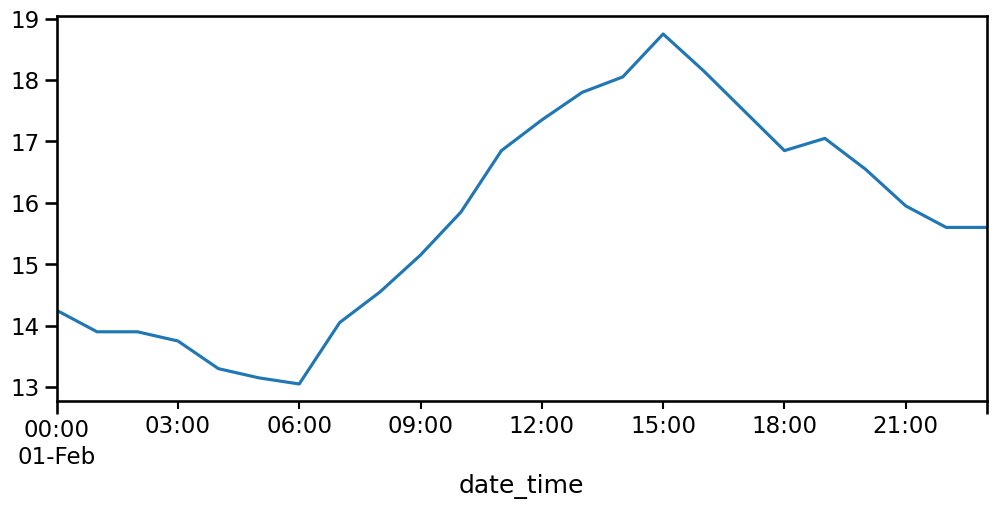

In [7]:
# Temperature on a single day
data["temperature"].loc["2015-02-01"].plot(figsize=[12, 5])

<img src="../images/Screenshot 2024-05-12 135639.jpg">

In [8]:
# Create a custom metric for the MAD
def mad(x):
    return np.median(np.abs(x - np.median(x)))

In [10]:
df = data.copy()
result = (
    df["demand"]
    .rolling(window=24) # Pick window size.
    .agg(["mean", "std", mad]) # Pick statistics.
    .shift(freq="1H") # Lag by 1 hour to avoid data leakage.
)  

result = result.add_prefix("demand_window_24_")

result

,demand_window_24_mean,demand_window_24_std,demand_window_24_mad
date_time,,,
2010-01-01 01:00:00,NaN,NaN,NaN
2010-01-01 02:00:00,NaN,NaN,NaN
2010-01-01 03:00:00,NaN,NaN,NaN
2010-01-01 04:00:00,NaN,NaN,NaN
2010-01-01 05:00:00,NaN,NaN,NaN
...,...,...,...
2015-02-28 20:00:00,8786.593557,957.615692,621.110944
2015-02-28 21:00:00,8764.566712,948.645664,655.453210
2015-02-28 22:00:00,8750.681279,952.771813,655.453210


In [11]:
df = df.join(result, how="left")
df

,demand,temperature,demand_window_24_mean,demand_window_24_std,demand_window_24_mad
date_time,,,,,
2010-01-01 00:00:00,8314.448682,21.525,NaN,NaN,NaN
2010-01-01 01:00:00,8267.187296,22.400,NaN,NaN,NaN
2010-01-01 02:00:00,7394.528444,22.150,NaN,NaN,NaN
2010-01-01 03:00:00,6952.047520,21.800,NaN,NaN,NaN
2010-01-01 04:00:00,6867.199634,20.250,NaN,NaN,NaN
...,...,...,...,...,...
2015-02-28 19:00:00,9596.777060,28.350,8802.565712,974.759690,712.857278
2015-02-28 20:00:00,8883.230296,22.200,8786.593557,957.615692,621.110944
2015-02-28 21:00:00,8320.260550,18.900,8764.566712,948.645664,655.453210


In [12]:
# The min_periods argument can be used to allow smaller window sizes to be applied at the start of the time series. This is one method to reduce the amount of missing data at the start of the time series. Alternatively, we could drop the missing data altogether.
result = (
    df["demand"]
    .rolling(window=24, min_periods=1) # Pick window size.
    .agg(["mean", "std", mad]) # Pick statistics.
    .shift(freq="1H") # Lag by 1 hour to avoid data leakage.
)  

result = result.add_prefix("demand_window_24_min_periods_")

df = df.join(result, how="left")
df[["demand", "demand_window_24_mean", "demand_window_24_min_periods_mean"]]

,demand,demand_window_24_mean,demand_window_24_min_periods_mean
date_time,,,
2010-01-01 00:00:00,8314.448682,NaN,NaN
2010-01-01 01:00:00,8267.187296,NaN,8314.448682
2010-01-01 02:00:00,7394.528444,NaN,8290.817989
2010-01-01 03:00:00,6952.047520,NaN,7992.054807
2010-01-01 04:00:00,6867.199634,NaN,7732.052986
...,...,...,...
2015-02-28 19:00:00,9596.777060,8802.565712,8802.565712
2015-02-28 20:00:00,8883.230296,8786.593557,8786.593557
2015-02-28 21:00:00,8320.260550,8764.566712,8764.566712


# Using Feature-engine

In [13]:
from feature_engine.timeseries.forecasting import WindowFeatures

In [14]:
# Create a copy of the data.
df = data.copy()

In [15]:
# Create window features using the transformer.
transformer = WindowFeatures(
    variables=["demand", "temperature"],
    functions=["mean", "std"],
    window=[24, 24 * 7, 24 * 365], # Day, week, year.
    freq="1H",
)

df = transformer.fit_transform(df)
df

,demand,temperature,demand_window_24_mean,demand_window_24_std,temperature_window_24_mean,temperature_window_24_std,demand_window_168_mean,demand_window_168_std,temperature_window_168_mean,temperature_window_168_std,demand_window_8760_mean,demand_window_8760_std,temperature_window_8760_mean,temperature_window_8760_std
date_time,,,,,,,,,,,,,,
2010-01-01 00:00:00,8314.448682,21.525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,8267.187296,22.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,7394.528444,22.150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 03:00:00,6952.047520,21.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 04:00:00,6867.199634,20.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-28 19:00:00,9596.777060,28.350,8802.565712,974.759690,21.856250,5.141695,9670.463454,1539.992921,21.085714,4.840353,9169.130177,1597.845042,16.279344,5.272056
2015-02-28 20:00:00,8883.230296,22.200,8786.593557,957.615692,22.216667,5.285145,9654.616819,1526.838185,21.069048,4.810218,9169.143383,1597.848099,16.280348,5.273518
2015-02-28 21:00:00,8320.260550,18.900,8764.566712,948.645664,22.360417,5.233421,9638.018555,1519.920008,21.031845,4.776845,9169.122487,1597.850641,16.280713,5.273817


# Expanding Window Features 

##### In rolling window featueres the window size remain constant but here we calculate that particular statistic using all the data up to the current point.  

In [16]:
data = pd.read_csv(
    "../Datasets/victoria_electricity_demand.csv",
    usecols=["demand", "temperature", "date_time"],
    index_col=["date_time"],
    parse_dates=["date_time"],
)

In [17]:
# For this demo we will use a subset of the data.
data = data.loc["2010":]

In [18]:
data.head()

,demand,temperature
date_time,,
2010-01-01 00:00:00,8314.448682,21.525
2010-01-01 01:00:00,8267.187296,22.400
2010-01-01 02:00:00,7394.528444,22.150
2010-01-01 03:00:00,6952.047520,21.800
2010-01-01 04:00:00,6867.199634,20.250


In [19]:
# Create a custom metric for the MAD
def mad(x):
    return np.median(np.abs(x - np.median(x)))

In [20]:
result = (
    df["demand"]
    .expanding()  # Use `expanding` rather than `rolling`.
    .agg(["mean", "std", mad]) # Pick statistics.
    .shift(freq="1H") # Lag by 1 hour to avoid data leakage.
)  

result = result.add_prefix("demand_expanding_window_")

result

,demand_expanding_window_mean,demand_expanding_window_std,demand_expanding_window_mad
date_time,,,
2010-01-01 01:00:00,8314.448682,NaN,0.000000
2010-01-01 02:00:00,8290.817989,33.418847,23.630693
2010-01-01 03:00:00,7992.054807,518.012283,47.261386
2010-01-01 04:00:00,7732.052986,670.294667,459.960119
2010-01-01 05:00:00,7559.082315,697.542450,527.328810
...,...,...,...
2015-02-28 20:00:00,9463.656071,1752.022191,1307.193992
2015-02-28 21:00:00,9463.643240,1752.004951,1307.102152
2015-02-28 22:00:00,9463.617965,1751.993833,1307.081377


In [21]:
df = df.join(result, how="left")
df

,demand,temperature,demand_window_24_mean,demand_window_24_std,temperature_window_24_mean,temperature_window_24_std,demand_window_168_mean,demand_window_168_std,temperature_window_168_mean,temperature_window_168_std,demand_window_8760_mean,demand_window_8760_std,temperature_window_8760_mean,temperature_window_8760_std,demand_expanding_window_mean,demand_expanding_window_std,demand_expanding_window_mad
date_time,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,8314.448682,21.525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,8267.187296,22.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8314.448682,NaN,0.000000
2010-01-01 02:00:00,7394.528444,22.150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8290.817989,33.418847,23.630693
2010-01-01 03:00:00,6952.047520,21.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7992.054807,518.012283,47.261386
2010-01-01 04:00:00,6867.199634,20.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7732.052986,670.294667,459.960119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-28 19:00:00,9596.777060,28.350,8802.565712,974.759690,21.856250,5.141695,9670.463454,1539.992921,21.085714,4.840353,9169.130177,1597.845042,16.279344,5.272056,9463.653128,1752.041445,1307.141316
2015-02-28 20:00:00,8883.230296,22.200,8786.593557,957.615692,22.216667,5.285145,9654.616819,1526.838185,21.069048,4.810218,9169.143383,1597.848099,16.280348,5.273518,9463.656071,1752.022191,1307.193992
2015-02-28 21:00:00,8320.260550,18.900,8764.566712,948.645664,22.360417,5.233421,9638.018555,1519.920008,21.031845,4.776845,9169.122487,1597.850641,16.280713,5.273817,9463.643240,1752.004951,1307.102152


# Using Feature Engine 

In [22]:
from feature_engine.timeseries.forecasting import ExpandingWindowFeatures

# Create a copy of the data.
df = data.copy()

# Create window features using the transformer.
transformer = ExpandingWindowFeatures(
    variables=["demand", "temperature"], 
    functions=["mean", "std"], 
    freq="1H" # Shift results back by 1 hour to avoid data leakage.
)  

df = transformer.fit_transform(df)
df

,demand,temperature,demand_expanding_mean,demand_expanding_std,temperature_expanding_mean,temperature_expanding_std
date_time,,,,,,
2010-01-01 00:00:00,8314.448682,21.525,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,8267.187296,22.400,8314.448682,NaN,21.525000,NaN
2010-01-01 02:00:00,7394.528444,22.150,8290.817989,33.418847,21.962500,0.618718
2010-01-01 03:00:00,6952.047520,21.800,7992.054807,518.012283,22.025000,0.450694
2010-01-01 04:00:00,6867.199634,20.250,7732.052986,670.294667,21.968750,0.384802
...,...,...,...,...,...,...
2015-02-28 19:00:00,9596.777060,28.350,9463.653128,1752.041445,16.277680,5.616737
2015-02-28 20:00:00,8883.230296,22.200,9463.656071,1752.022191,16.277947,5.616962
2015-02-28 21:00:00,8320.260550,18.900,9463.643240,1752.004951,16.278078,5.616969


In [23]:
# In practice, expanding windows are used less often than rolling windows because the most recent time periods tend to be more useful for forecasting. Exponential weights are normally combined with expanding windows to give more weight to recent data

# Weighted rolling window features 

In [24]:
### Here we add weights to the rolling window features 

In [ ]:
data = pd.read_csv(
    "../Datasets/victoria_electricity_demand.csv",
    usecols=["demand", "temperature", "date_time"],
    index_col=["date_time"],
    parse_dates=["date_time"],
)

In [ ]:
# For this demo we will use a subset of the data
data = data.loc["2010":]

In [ ]:
data.head()

<img src="../images/Screenshot 2024-05-12 140842.jpg">

In [ ]:
df = data.copy()

In [ ]:
# Define our own weighted mean function to pass to .apply()
def weighted_mean(x, weights):
    return (weights * x).sum() / weights.sum()

# Define our own weighted std function to pass to .apply()
def weighted_std(x, weights):
    mean_w = weighted_mean(x, weights)
    var_w = (weights * (x - mean_w)**2).sum() / weights.sum()
    return np.sqrt(var_w)

In [ ]:
# Let's compute the rolling weighted mean and standard deviation. The weights and window size are not independent. They must be the same size.

In [ ]:
# Specify weights
# Here we shall use linear weights
weights = np.arange(1, 24 * 7 + 1)  # [1, 2, ..., 168]

# Compute weighted mean
result = (
    df["demand"]
    .rolling(window=24 * 7) # Pick window size. Needs to be same as len(weights).
    .apply(weighted_mean, args=(weights,)) # Apply our custom function.
    .shift(freq="1H") # Lag by 1 hour to avoid data leakage.
    .to_frame() # Convert output from Series to DataFrame.
)  

result.columns = ["demand_weighted_window_168_mean"]

df = df.join(result, how="left")




# Specify weights
weights = np.arange(1, 24 * 7 + 1)  # [1, 2, ..., 168]

# Compute weighted standard deviation
result = (
    df["demand"]
    .rolling(window=24 * 7)  # Pick window size. Needs to be same as len(weights).
    .apply(weighted_std, args=(weights,))  # Apply our custom function.
    .shift(freq="1H")  # Lag by 1 hour to avoid data leakage.
    .to_frame() # Convert output from Series to DataFrame.
)  

result.columns = ["demand_weighted_window_168_std"]

# Join the result back to the original dataframe.
df = df.join(result, how="left")



result = (
    df["demand"]
    .rolling(window=24 * 7)  # Pick window size.
    .agg(["mean"])  # Pass our own functions.
    .shift(freq="1H")  # Lag by 1 hour to avoid data leakage.
)  





result.columns = ["demand_window_168_mean"]
df = df.join(result, how="left")
df

# Lets use sktime 

In [25]:
from sktime.transformations.series.summarize import WindowSummarizer

In [26]:
# Create a copy of the data.
df = data.copy()

In [27]:
# Define our own weighted mean function with weights defined inside
def weighted_mean(x):
    weights = np.arange(1, 24*7 + 1) # [1, 2, ..., 168]
    return (weights * x).sum() / weights.sum()

In [28]:
transformer = WindowSummarizer(
    lag_feature={
        "lag": [1, 2, 3], # Lag features.
        "mean": [[1, 12], [1, 3]], # [[lag, window size]]
        "std": [[1, 12], [3, 12]],
        weighted_mean: [[1, 24 * 7]], # Can pass custom functions.
    },
    target_cols=["demand"],
)

result = transformer.fit_transform(df)
result

,demand_lag_1,demand_lag_2,demand_lag_3,demand_mean_1_12,demand_mean_1_3,demand_std_1_12,demand_std_3_12,demand_weighted_mean_1_168,temperature
date_time,,,,,,,,,
2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.525
2010-01-01 01:00:00,8314.448682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.400
2010-01-01 02:00:00,8267.187296,8314.448682,NaN,NaN,NaN,NaN,NaN,NaN,22.150
2010-01-01 03:00:00,7394.528444,8267.187296,8314.448682,NaN,7992.054807,NaN,NaN,NaN,21.800
2010-01-01 04:00:00,6952.047520,7394.528444,8267.187296,NaN,7537.921087,NaN,NaN,NaN,20.250
...,...,...,...,...,...,...,...,...,...
2015-02-28 19:00:00,9979.909902,10258.585392,10019.921572,9453.296237,10086.138955,468.988596,658.090105,9466.913081,28.350
2015-02-28 20:00:00,9596.777060,9979.909902,10258.585392,9533.335885,9945.090785,392.623251,555.335360,9466.041052,22.200
2015-02-28 21:00:00,8883.230296,9596.777060,9979.909902,9531.087995,9486.639086,396.572553,468.988596,9456.912218,18.900


In [29]:
df = result.join(df["demand"], how="left")
df

,demand_lag_1,demand_lag_2,demand_lag_3,demand_mean_1_12,demand_mean_1_3,demand_std_1_12,demand_std_3_12,demand_weighted_mean_1_168,temperature,demand
date_time,,,,,,,,,,
2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.525,8314.448682
2010-01-01 01:00:00,8314.448682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.400,8267.187296
2010-01-01 02:00:00,8267.187296,8314.448682,NaN,NaN,NaN,NaN,NaN,NaN,22.150,7394.528444
2010-01-01 03:00:00,7394.528444,8267.187296,8314.448682,NaN,7992.054807,NaN,NaN,NaN,21.800,6952.047520
2010-01-01 04:00:00,6952.047520,7394.528444,8267.187296,NaN,7537.921087,NaN,NaN,NaN,20.250,6867.199634
...,...,...,...,...,...,...,...,...,...,...
2015-02-28 19:00:00,9979.909902,10258.585392,10019.921572,9453.296237,10086.138955,468.988596,658.090105,9466.913081,28.350,9596.777060
2015-02-28 20:00:00,9596.777060,9979.909902,10258.585392,9533.335885,9945.090785,392.623251,555.335360,9466.041052,22.200,8883.230296
2015-02-28 21:00:00,8883.230296,9596.777060,9979.909902,9531.087995,9486.639086,396.572553,468.988596,9456.912218,18.900,8320.260550


# Exponentail Weights Features 

In [30]:
data = pd.read_csv(
    "../Datasets/victoria_electricity_demand.csv",
    usecols=["demand", "temperature", "date_time"],
    index_col=["date_time"],
    parse_dates=["date_time"],
)

In [31]:
# For this demo we will use a subset of the data
data = data.loc["2010":]

In [32]:
data.head()

,demand,temperature
date_time,,
2010-01-01 00:00:00,8314.448682,21.525
2010-01-01 01:00:00,8267.187296,22.400
2010-01-01 02:00:00,7394.528444,22.150
2010-01-01 03:00:00,6952.047520,21.800
2010-01-01 04:00:00,6867.199634,20.250


In [33]:
df = data.copy()

<img src="../images/Screenshot 2024-05-12 141910.jpg">

In [34]:
# Compute exponential weights
def exp_weights(alpha, window_size):
    weights = np.ones(window_size) # Initialise weights
    for ix in range(window_size):
        weights[ix] = (1-alpha)**(window_size-1-ix)
    return weights

In [35]:
# Check it works
exp_weights(alpha=0.05, window_size=12)

array([0.56880009, 0.59873694, 0.63024941, 0.66342043, 0.6983373 ,
       0.73509189, 0.77378094, 0.81450625, 0.857375  , 0.9025    ,
       0.95      , 1.        ])

In [36]:
# Double check the second term
print((1-0.05) * 0.95)

0.9025


In [37]:
# Define our own weighted mean function to pass to `agg`
def exp_weighted_mean(x):
    weights = exp_weights(alpha=0.05, window_size=len(x))
    return (weights * x).sum() / weights.sum()

In [38]:
result = (
    df["demand"]
    .rolling(window=24*7) # Pick window size.
    .agg(["mean", exp_weighted_mean]) # Pick statistics.
    .shift(freq="1H") # Lag by 1 hour to avoid data leakage.  
)
result = result.add_prefix("demand_window_168_")

result


,demand_window_168_mean,demand_window_168_exp_weighted_mean
date_time,,
2010-01-01 01:00:00,NaN,NaN
2010-01-01 02:00:00,NaN,NaN
2010-01-01 03:00:00,NaN,NaN
2010-01-01 04:00:00,NaN,NaN
2010-01-01 05:00:00,NaN,NaN
...,...,...
2015-02-28 20:00:00,9654.616819,9270.767464
2015-02-28 21:00:00,9638.018555,9251.365371
2015-02-28 22:00:00,9624.108291,9204.788983


In [39]:
df = df.join(result, how="left")
df

,demand,temperature,demand_window_168_mean,demand_window_168_exp_weighted_mean
date_time,,,,
2010-01-01 00:00:00,8314.448682,21.525,NaN,NaN
2010-01-01 01:00:00,8267.187296,22.400,NaN,NaN
2010-01-01 02:00:00,7394.528444,22.150,NaN,NaN
2010-01-01 03:00:00,6952.047520,21.800,NaN,NaN
2010-01-01 04:00:00,6867.199634,20.250,NaN,NaN
...,...,...,...,...
2015-02-28 19:00:00,9596.777060,28.350,9670.463454,9253.634423
2015-02-28 20:00:00,8883.230296,22.200,9654.616819,9270.767464
2015-02-28 21:00:00,8320.260550,18.900,9638.018555,9251.365371


In [40]:
# The rolling mean with exponential weights is a lot more sensitive to changes in the original data because there is a lot more weight given to recent data points. This means that the daily seasonality causes the exponentially weighted data to oscillate.If we want to use the weighted window functions to be more responsive to short term trends then de-seasonalising the data first may be helpful. Let's try this and see what happens.

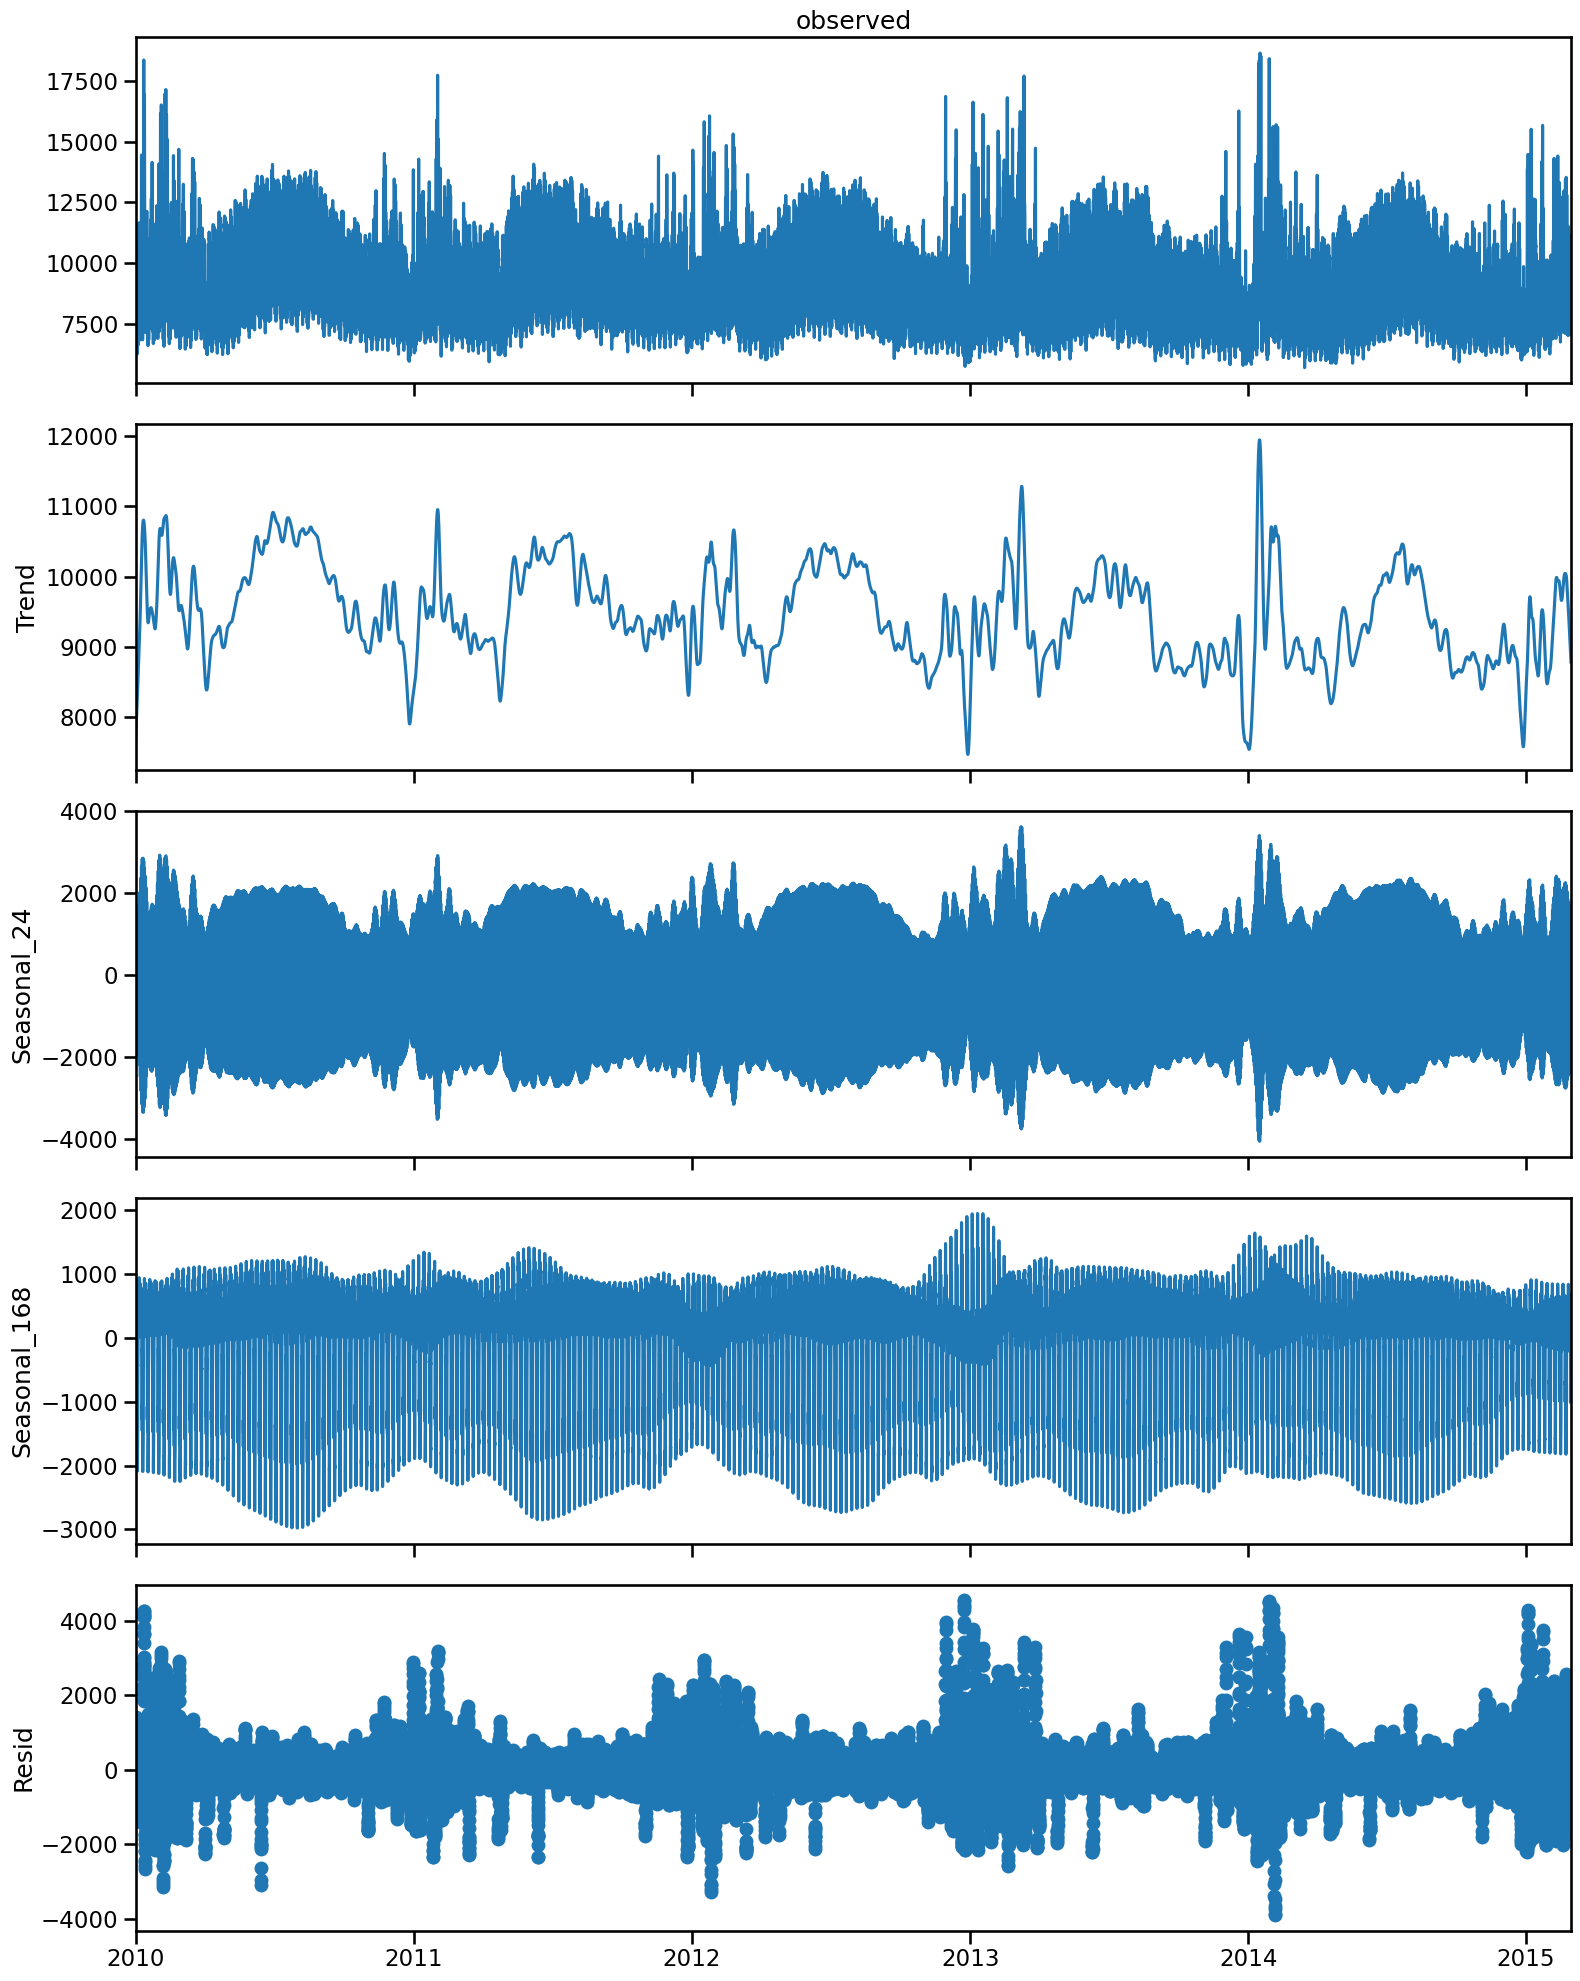

In [41]:
# Smoothing the data after de-trending
#As there is multiple seasonal components we shall use MSTL to de-seasonalise the data.

from statsmodels.tsa.seasonal import MSTL


# Let's extract only the trend component
mstl = MSTL(df["demand"], 
            periods=(24, 24 * 7), # Remove daily and weekly seasonality
            stl_kwargs={"seasonal_deg": 0})
res = mstl.fit()


plt.rc("figure", figsize=(16, 20))
plt.rc("font", size=13)
fig = res.plot()

In [42]:
result = (
    res.trend # The trend component from MSTL.
    .rolling(window=24*7) # Pick window size.
    .agg(["mean", exp_weighted_mean]) # Pick statistics.
    .shift(freq="1H") # Lag by 1 hour to avoid data leakage.  
)

result = result.add_prefix("demand_window_168_")

# Join the window features back to the trend data
df = res.trend.to_frame().join(result, how='left')
df

,trend,demand_window_168_mean,demand_window_168_exp_weighted_mean
date_time,,,
2010-01-01 00:00:00,7672.016455,NaN,NaN
2010-01-01 01:00:00,7683.091900,NaN,NaN
2010-01-01 02:00:00,7694.177071,NaN,NaN
2010-01-01 03:00:00,7705.272092,NaN,NaN
2010-01-01 04:00:00,7716.377060,NaN,NaN
...,...,...,...
2015-02-28 19:00:00,8817.785857,9541.062328,8999.626058
2015-02-28 20:00:00,8808.736317,9533.775910,8990.522970
2015-02-28 21:00:00,8799.694076,9526.439463,8981.422484


Text(0.5, 0, 'Time')

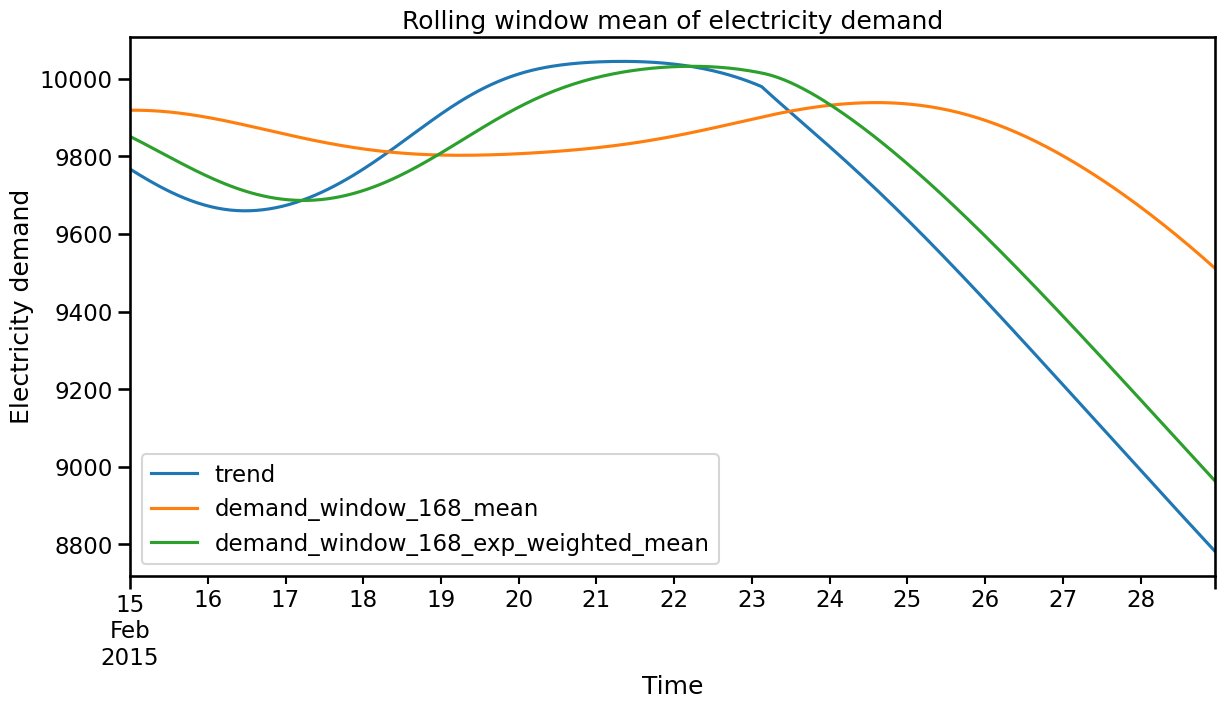

In [43]:
cols = ["trend",
        "demand_window_168_mean",
        "demand_window_168_exp_weighted_mean"]

ax = (
    df.iloc[-24 * 7 * 2 :] # Let's look at the last 2 weeks of data
      .loc[:, cols] # Filter to columns of interest
      .plot(figsize=[14, 7])
    )  

ax.set_title("Rolling window mean of electricity demand")
ax.set_ylabel("Electricity demand")
ax.set_xlabel("Time")

# Choosing window features using LASSO 

In [44]:
data = pd.read_csv(
    "../Datasets/victoria_electricity_demand.csv",
    usecols=["demand", "temperature", "date_time"],
    index_col=["date_time"],
    parse_dates=["date_time"],
)

In [45]:
# For this demo we will use a subset of the data
data = data.loc["2010":]

In [46]:
data.head()

,demand,temperature
date_time,,
2010-01-01 00:00:00,8314.448682,21.525
2010-01-01 01:00:00,8267.187296,22.400
2010-01-01 02:00:00,7394.528444,22.150
2010-01-01 03:00:00,6952.047520,21.800
2010-01-01 04:00:00,6867.199634,20.250


In [47]:
from feature_engine.timeseries.forecasting import LagFeatures, WindowFeatures, ExpandingWindowFeatures
from feature_engine.imputation import DropMissingData
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [48]:
df = data.copy()

In [49]:
# Lag features
lag_transformer = LagFeatures(variables=["demand", "temperature"],
                              periods=[1, 2, 3, 24, 24 * 7])

In [50]:
# Window features
window_transformer = WindowFeatures(
    variables=["demand", "temperature"],
    functions=["mean", "std", "kurt", "skew"],
    window=[24, 24 * 7, 24 * 7 * 4, 24 * 7 * 4 * 12],
    periods=1,
)

In [51]:
# Expanding features
expanding_window_transformer = ExpandingWindowFeatures(
    variables=["demand"], 
    functions=["mean", "std", "kurt", "skew"]
)

In [52]:
# Drop missing data introduced by window and lag features
imputer = DropMissingData()

In [53]:
pipe = Pipeline(
    [
        ("lag", lag_transformer),
        ("rolling", window_transformer),
        ("expanding", expanding_window_transformer),
        ("drop_missing", imputer)
    ]
)

df = pipe.fit_transform(df)
df

,demand,temperature,demand_lag_1,temperature_lag_1,demand_lag_2,temperature_lag_2,demand_lag_3,temperature_lag_3,demand_lag_24,temperature_lag_24,...,demand_window_8064_kurt,demand_window_8064_skew,temperature_window_8064_mean,temperature_window_8064_std,temperature_window_8064_kurt,temperature_window_8064_skew,demand_expanding_mean,demand_expanding_std,demand_expanding_kurt,demand_expanding_skew
date_time,,,,,,,,,,,,,,,,,,,,,
2010-12-03 00:00:00,7650.165828,17.825,8311.641438,18.325,8194.758870,18.650,8810.225934,19.000,7594.965872,18.500,...,-0.103898,0.422491,15.744401,5.742699,0.659439,0.778176,9842.090580,1804.188369,-0.103898,0.422491
2010-12-03 01:00:00,7927.140368,17.850,7650.165828,17.825,8311.641438,18.325,8194.758870,18.650,7914.538048,18.375,...,-0.104160,0.422422,15.743942,5.742385,0.660363,0.778423,9841.818798,1804.241597,-0.104074,0.422631
2010-12-03 02:00:00,7327.146056,17.675,7927.140368,17.850,7650.165828,17.825,8311.641438,18.325,7321.428112,17.875,...,-0.104297,0.422397,15.743378,5.741955,0.661546,0.778705,9841.581422,1804.255693,-0.104144,0.422815
2010-12-03 03:00:00,7088.725786,17.625,7327.146056,17.675,7927.140368,17.850,7650.165828,17.825,7045.315052,17.425,...,-0.104314,0.422377,15.742823,5.741552,0.662685,0.778992,9841.269728,1804.361038,-0.104420,0.422872
2010-12-03 04:00:00,7458.314830,17.625,7088.725786,17.625,7327.146056,17.675,7927.140368,17.850,7396.896962,17.275,...,-0.104304,0.422436,15.742305,5.741194,0.663728,0.779267,9840.928560,1804.509421,-0.104740,0.422842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-28 19:00:00,9596.777060,28.350,9979.909902,30.850,10258.585392,31.550,10019.921572,31.250,9980.108798,19.700,...,-0.398990,0.291512,15.987450,5.252119,1.053306,0.793359,9463.653128,1752.041445,0.252346,0.499886
2015-02-28 20:00:00,8883.230296,22.200,9596.777060,28.350,9979.909902,30.850,10258.585392,31.550,9411.874558,18.750,...,-0.398995,0.291267,15.988492,5.253737,1.051447,0.793594,9463.656071,1752.022191,0.252414,0.499886
2015-02-28 21:00:00,8320.260550,18.900,8883.230296,22.200,9596.777060,28.350,9979.909902,30.850,8653.510960,18.300,...,-0.398790,0.291143,15.988814,5.254039,1.050537,0.793438,9463.643240,1752.004951,0.252485,0.499911


In [54]:
# Let's split the data into a training set and test set
# We'll hold the most recent day as a test set
split_date = df.index[-1] - pd.Timedelta("1D")
df_train = df[df.index <= split_date]
df_test =  df[df.index > split_date]
df_train.tail()

,demand,temperature,demand_lag_1,temperature_lag_1,demand_lag_2,temperature_lag_2,demand_lag_3,temperature_lag_3,demand_lag_24,temperature_lag_24,...,demand_window_8064_kurt,demand_window_8064_skew,temperature_window_8064_mean,temperature_window_8064_std,temperature_window_8064_kurt,temperature_window_8064_skew,demand_expanding_mean,demand_expanding_std,demand_expanding_kurt,demand_expanding_skew
date_time,,,,,,,,,,,,,,,,,,,,,
2015-02-27 19:00:00,9980.108798,19.70,10068.040568,20.85,10483.536412,21.55,10960.255988,22.50,10190.802512,19.70,...,-0.401271,0.293753,15.975459,5.238756,1.063314,0.792157,9464.004063,1752.302275,0.251445,0.499568
2015-02-27 20:00:00,9411.874558,18.75,9980.108798,19.70,10068.040568,20.85,10483.536412,21.55,9610.025236,18.60,...,-0.401475,0.293600,15.975663,5.238869,1.062868,0.792025,9464.015478,1752.284576,0.251491,0.499553
2015-02-27 21:00:00,8653.510960,18.30,9411.874558,18.75,9980.108798,19.70,10068.040568,20.85,8719.930158,17.80,...,-0.401489,0.293441,15.975769,5.238916,1.062665,0.791956,9464.014325,1752.265215,0.251564,0.499561
2015-02-27 22:00:00,8256.683092,18.15,8653.510960,18.30,9411.874558,18.75,9980.108798,19.70,8271.486968,17.80,...,-0.401304,0.293361,15.975905,5.238962,1.062443,0.791866,9463.996399,1752.249983,0.251627,0.499591
2015-02-27 23:00:00,8716.498334,17.80,8256.683092,18.15,8653.510960,18.30,9411.874558,18.75,8800.900636,17.65,...,-0.401094,0.293336,15.976079,5.239011,1.062190,0.791753,9463.969697,1752.239804,0.251666,0.499627


In [55]:
df_test.head()

,demand,temperature,demand_lag_1,temperature_lag_1,demand_lag_2,temperature_lag_2,demand_lag_3,temperature_lag_3,demand_lag_24,temperature_lag_24,...,demand_window_8064_kurt,demand_window_8064_skew,temperature_window_8064_mean,temperature_window_8064_std,temperature_window_8064_kurt,temperature_window_8064_skew,demand_expanding_mean,demand_expanding_std,demand_expanding_kurt,demand_expanding_skew
date_time,,,,,,,,,,,,,,,,,,,,,
2015-02-28 00:00:00,8003.228986,17.65,8716.498334,17.80,8256.683092,18.15,8653.510960,18.30,8121.868698,17.05,...,-0.400972,0.293260,15.976265,5.239049,1.061962,0.791634,9463.953166,1752.223953,0.251731,0.499656
2015-02-28 01:00:00,7522.862620,17.20,8003.228986,17.65,8716.498334,17.80,8256.683092,18.15,7629.796248,16.55,...,-0.400779,0.293268,15.976438,5.239082,1.061758,0.791524,9463.920861,1752.218042,0.251751,0.499693
2015-02-28 02:00:00,7156.310422,17.20,7522.862620,17.20,8003.228986,17.65,8716.498334,17.80,7316.774812,15.95,...,-0.400588,0.293403,15.976600,5.239099,1.061606,0.791426,9463.877934,1752.222443,0.251728,0.499721
2015-02-28 03:00:00,7074.676782,17.20,7156.310422,17.20,7522.862620,17.20,8003.228986,17.65,7280.901386,15.30,...,-0.400539,0.293662,15.976804,5.239115,1.061434,0.791303,9463.826904,1752.236670,0.251676,0.499735
2015-02-28 04:00:00,7204.031944,17.20,7074.676782,17.20,7156.310422,17.20,7522.862620,17.20,7603.832712,14.25,...,-0.400547,0.293967,15.977034,5.239128,1.061256,0.791167,9463.774070,1752.253314,0.251617,0.499744


In [56]:
# Create target variable
y_train = df_train["demand"]

# Drop demand and temperature as features, we do not know them at predict time.
X_train = df_train.drop(columns=["demand", "temperature"])

In [57]:
X_train_ = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(data=X_train_, columns=X_train.columns)

In [58]:
from sklearn.linear_model import Lasso

In [59]:
model = Lasso(alpha=1, random_state=0)
model.fit(X_train, y_train)

Lasso(alpha=1, random_state=0)

In [60]:
feature_importances = pd.Series(index=X_train.columns, data=model.coef_)

In [61]:
feature_importances.abs().sort_values(ascending=False)

demand_lag_1                    2190.943047
demand_lag_2                     877.510005
demand_lag_168                   213.888675
temperature_lag_1                190.948998
demand_window_24_mean            147.480480
temperature_lag_3                103.812987
demand_lag_24                    102.349227
demand_window_24_skew             63.210775
temperature_lag_168               55.132948
demand_window_168_mean            41.089953
demand_lag_3                      36.014360
temperature_window_24_mean        32.886558
demand_window_672_mean            21.355831
temperature_window_24_std         17.670526
temperature_window_24_skew        13.614140
temperature_lag_24                12.771168
demand_expanding_kurt              9.456486
demand_expanding_mean              7.193448
demand_window_672_kurt             5.706723
temperature_window_24_kurt         5.626029
temperature_window_168_skew        4.992910
temperature_lag_2                  4.831044
temperature_window_8064_std     